In [1]:
using LinearAlgebra
using Distributed
using SharedArrays
using Plots
using DataFrames, CSV

In [2]:
using BeyondHulten

## Loading in Data

In [3]:
data = read_data_cb("I-O_DE2019_formatiert.csv")

CBData(84×87 DataFrame
 Row │ Sektoren                           Erz. d. Landwirtschaft, Jagd und Die ⋯
     │ String                             Int64                                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Erz. d. Landwirtschaft, Jagd und…                                       ⋯
   2 │ Forstwirtschaftl. Erzeugnisse un…
   3 │ Fische, Fischerei- und Aquakultu…
   4 │ Kohle
   5 │ Erdöl und Erdgas                                                        ⋯
   6 │ Erze, Steine und Erden, sonstige…
   7 │ Nahrungs- u. Futtermittel, Geträ…
   8 │ Textilien, Bekleidung, Leder und…
  ⋮  │                 ⋮                                          ⋮            ⋱
  78 │ Bruttolöhne und -gehälter                                               ⋯
  79 │ Sonst.Produktionsabgaben abzgl. …
  80 │ Abschreibungen
  81 │ Nettobetriebsüberschuss
  82 │ Bruttowertschöpfung                                                     ⋯
  83 │ Produktion

In [4]:
demand_shock = ones(71)
supply_shock = ones(71)
shocks = Shocks(supply_shock, demand_shock)
##shocks.demand_shock[35] = 1.09
#sector = ["Vorb.Baustellen-,Bauinstallations-,Ausbauarbeiten"]
#investment = [25000]
#calculate_investment!(shocks, data, investment, sector)

Shocks([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [5]:
elasticities = CBELasticities(0.3,0.7)

CBELasticities(0.3, 0.7)

In [21]:
solution = solve_cobb_douglas_modell(data, shocks, elasticities)

retcode: Success
u: 142-element Vector{ComplexF64}:
  4.6692387893788424e-73 - 8.423579321111893e-73im
   5.497603091069639e-74 + 8.775190420570746e-74im
   6.127844552020849e-68 + 4.0239479835712436e-69im
   6.871279670158507e-75 - 1.055798254714461e-74im
   3.388526177169625e-73 + 3.734944575556067e-73im
  -8.395112795734714e-77 - 3.465777632999578e-76im
   6.166326515258824e-75 + 9.102163479588665e-76im
 -1.1827013582034699e-75 + 7.075211062731589e-76im
  2.4285491699101165e-76 - 7.047607663825272e-76im
  2.2482900611518597e-77 - 1.368787295993323e-77im
                         ⋮
   8.272141245142928e-21 + 7.934350691779436e-21im
  -2.732282892097722e-18 - 2.0060248722953834e-18im
 -1.4152360885791412e-18 + 1.4574070733776143e-18im
 -1.0791299993999017e-20 + 1.321881387461653e-20im
    6.75001820921865e-19 - 4.0285853732590498e-19im
  2.2789663514781777e-19 + 8.751594223732079e-18im
  1.3672476034747007e-19 - 1.3392912017149752e-20im
 -2.0988856702378972e-23 - 8.839795663453615e-22i

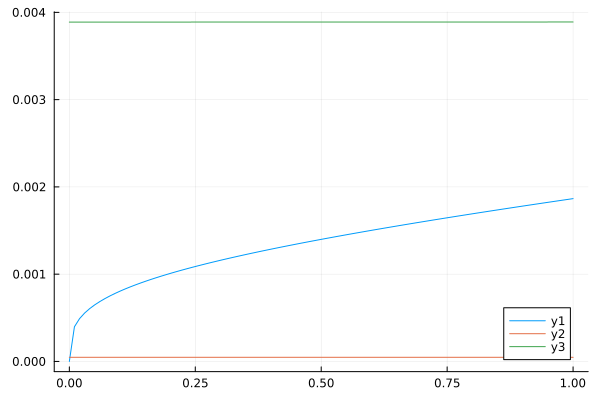

In [24]:
plot(range(0,1,100),x -> cobb_douglas_costfun(vcat(x,ones(70)),data.λ,data)[1])
plot!(range(0,1,100),x -> cobb_douglas_costfun(vcat(1,1,ones(69)),data.λ,data)[2])
plot!(range(0,1,100),x -> cobb_douglas_costfun(vcat(1,1,1,x,ones(67)),data.λ,data)[50])

In [16]:
BeyondHulten.cobb_douglas_costfun(ones(71),data.λ, data)

71-element Vector{Float64}:
 0.0018654852688891287
 4.714283267653617e-5
 6.211956506496819e-7
 1.2573122760849473e-5
 3.591104150159754e-6
 0.00019587634130726798
 0.018954568275292336
 0.0004472914428205596
 0.000575432888249523
 0.0015014088018356106
 ⋮
 0.0007764942792352926
 0.011384478889085413
 0.018696361987832134
 0.004877873119811578
 0.0007269075230657244
 0.0005787913636858084
 0.0010442708385839904
 2.138902793848737e-5
 0.0015419209210163264